# Yelp API - Lab

The previously deployed lab on working around building a GIS with Yelp API and Folium can be found [here](https://github.com/learn-co-curriculum/dsc-2-15-10-yelp-api-gis-lab/tree/a56358c2d0c2daf569a5f50937c4c27463aadb1a) (not relevant for new students).


## Introduction 

Now that we've seen how the Yelp API works, and some basic Folium visualizations its time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 
* Create HTTP requests to get data from Yelp API
* Parse HTTP responses and perform data analysis on the data returned
* Perform pagination to retrieve troves of data!
* Create a simple geographical system on to view information about selected businesses, at a given location. 

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retriving 50 at a time. Processes such as these are often refered to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you, but make the request below.

In [5]:
#Your code here
import requests

client_id = '6h3dsES72YBIdxWt3Ssa3w'
api_key = 'HHt5WeN3qpCmldKpaUKGFsGwH8PfYk5v-Lx9osVK3AXATUVunRgKokzXsqSY6TpV7TZRKMadaTL7NN_JHjaEwIyYo0afK6aNzZthHtLTkwt4Twg7rRce0gWCeGSRXHYx'

term = 'Japanese'
location = 'NYC'
#SEARCH_LIMIT = 20

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                #'limit': SEARCH_LIMIT
            }

response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "axqp3pGJXnTLgq2QrPyDyQ", "alias": "benemon-new-york", "name": "Benemon", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/B-_lF8sP0pLsAiuvxZFjLQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/benemon-new-york?adjust_creative=6h3dsES72YBIdxWt3Ssa3w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=6h3dsES72YBIdxWt3Ssa3w", "review_count": 467, "categories": [{"alias": "japanese", "title": "Japanese"}, {"alias": "comfortfood", "title": "Comfort Food"}, {"alias": "tapasmallplates", "title": "Tapas/Small Plates"}], "rating": 4.5, "coordinates": {"latitude": 40.72551, "longitude": -73.98838}, "transactions": [], "price": "$$", "location": {"address1": "108 E 4th St", "address2": null, "address3": "", "city": "New York", "zip_code": "10003", "country": "US", "state": "NY", "display_address": ["108 E 4th St", "New York, NY 10003"]}, "phone": "+12126143006", "display_phone": "(212) 614-3006", "distance

In [6]:
len(response.json()['businesses'])

20

## Pagination

Now that you have an initial response, you can examine the contents of the json container. For example, you might start with ```response.josn().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day, and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [8]:
# Your code here; use a function or loop to retrieve all the results from your original request
import pandas as pd
import time


url_params = {  
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50,
                'offset': 0
             }


def yelp_call(url_params):
    
    response = requests.get(url, headers=headers, params=url_params)
    df = pd.DataFrame(response.json()['businesses'])
    return df


def yelp_data(df, url_params):
    



total = response.json()['total']
print('{} total matches found.'.format(total))
entries = 0
yelp_dfs = []
while entries < total and entries < 1000:
    #change offset parameter so that we grab different yelp entries
    #keep all the other parameters the same
    url_params['offset'] = entries
    #get dataframe of set of entries
    yelp_df = yelp_call(url_params)
    #append to list
    yelp_dfs.append(yelp_df)
    #Wait a second
    time.sleep(1) 
    #advance the entries
    entries += 50
df = pd.concat(yelp_dfs, ignore_index=True)
                
print(len(df))
df.head()



2600 total matches found.
1000


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,benemon-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.72551, 'longitude': -73.98838}",(212) 614-3006,2289.203859,axqp3pGJXnTLgq2QrPyDyQ,https://s3-media2.fl.yelpcdn.com/bphoto/B-_lF8...,False,"{'address1': '108 E 4th St', 'address2': None,...",Benemon,+12126143006,$$,4.5,467,[],https://www.yelp.com/biz/benemon-new-york?adju...
1,izakaya-mew-new-york-3,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...","{'latitude': 40.7501853096499, 'longitude': -7...",(646) 368-9384,5020.064167,klAhw3xLQi9GF1tf_HnS7w,https://s3-media4.fl.yelpcdn.com/bphoto/Iix5fX...,False,"{'address1': '53 W 35th St', 'address2': '', '...",Izakaya MEW,+16463689384,$$,4.0,2002,"[pickup, delivery]",https://www.yelp.com/biz/izakaya-mew-new-york-...
2,sakagura-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}]","{'latitude': 40.7516467024541, 'longitude': -7...",(212) 953-7253,5443.138436,7iY35991NhQ1AShJZCNZgA,https://s3-media4.fl.yelpcdn.com/bphoto/f-Z182...,False,"{'address1': '211 E 43rd St', 'address2': '', ...",Sakagura,+12129537253,$$$,4.0,1698,[],https://www.yelp.com/biz/sakagura-new-york?adj...
3,raku-new-york-7,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.7264988089246, 'longitude': -7...",(212) 228-1324,2428.039249,FlZ1zdVEKWv7dwqm8Uw8-w,https://s3-media4.fl.yelpcdn.com/bphoto/GEbZnH...,False,"{'address1': '342 E 6th St', 'address2': '', '...",Raku,+12122281324,$$,4.5,839,"[pickup, delivery]",https://www.yelp.com/biz/raku-new-york-7?adjus...
4,izakaya-new-york-2,"[{'alias': 'izakaya', 'title': 'Izakaya'}, {'a...","{'latitude': 40.72667, 'longitude': -73.98738}",(917) 697-7162,2435.198897,i8F0fnempD5fTb2CxbwKDw,https://s3-media2.fl.yelpcdn.com/bphoto/p-pwtu...,False,"{'address1': '326 E 6th St', 'address2': '', '...",Izakaya,+19176977162,$$,4.0,235,[],https://www.yelp.com/biz/izakaya-new-york-2?ad...


In [ ]:


df =[]
total = response.json()['total']
def yelp_data(df, url_params):
    
    
    

## Exploratory Analysis

Take the restaurants from the previous question and do an intial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

print(len(df))
print(df.columns)
df.head(2)

1000
Index(['alias', 'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'name', 'phone', 'price',
       'rating', 'review_count', 'transactions', 'url', 'prices'],
      dtype='object')


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,prices
0,benemon-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.72551, 'longitude': -73.98838}",(212) 614-3006,2289.203859,axqp3pGJXnTLgq2QrPyDyQ,https://s3-media2.fl.yelpcdn.com/bphoto/B-_lF8...,False,"{'address1': '108 E 4th St', 'address2': None,...",Benemon,+12126143006,$$,4.5,467,[],https://www.yelp.com/biz/benemon-new-york?adju...,2
1,izakaya-mew-new-york-3,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...","{'latitude': 40.7501853096499, 'longitude': -7...",(646) 368-9384,5020.064167,klAhw3xLQi9GF1tf_HnS7w,https://s3-media4.fl.yelpcdn.com/bphoto/Iix5fX...,False,"{'address1': '53 W 35th St', 'address2': '', '...",Izakaya MEW,+16463689384,$$,4.0,2002,"[delivery, pickup]",https://www.yelp.com/biz/izakaya-mew-new-york-...,2


Check if the data has null values

In [10]:
df.isna().sum()

alias             0
categories        0
coordinates       0
display_phone     0
distance          0
id                0
image_url         0
is_closed         0
location          0
name              0
phone             0
price            88
rating            0
review_count      0
transactions      0
url               0
dtype: int64

lets check for the nan values in price and see how often the other values appear

In [13]:
print(df['price'].unique())
print(df['price'].value_counts())

['$$' '$$$' nan '$$$$' '$']
$$      701
$$$      86
$        64
$$$$     61
Name: price, dtype: int64


replace nan with the most common value which is $$

In [14]:
df['price'] = df['price'].fillna('$$')

lets check the unique values in the columns again and the count of each value to see if it was replaced

In [15]:
print(df['price'].unique())
print(df['price'].value_counts())

['$$' '$$$' '$$$$' '$']
$$      789
$$$      86
$        64
$$$$     61
Name: price, dtype: int64


Check other columns to see if they have placeholder values

In [20]:
print("unique rating: ", df['rating'].unique())
print("unique review_count: ", df['review_count'].unique())
print(max(df['review_count']))

unique rating:  [4.5 4.  5.  3.5 3.  2.5 2. ]
unique review_count:  [ 467 2002 1698  839  235  412 1276  701  205  256  809  190  291  941
  957 1237   54 1625  808  631   61  791    6   82  174   78  273  443
  248  139   27  166  595  197  188  828  113 1523  164  333  936 1207
  201  346  379  354   18 1533   47 1397   24  671   62  555   79    8
  708 1181  173  102  322  152   50  149  196  259  154   85  220   41
  107  131  457  307  223  240  946  320   14  224  475   15  554  215
  210   31  105  100  693  387  670 1154   94  258  760  169 2922    3
 1667  823   53  198  400  156  934  327  246  269  422  134  593  540
   52  214   17  527  385   68  464  122   55  208  129 1031   93  265
   36  350   72  512  640 1230  202   20  263  209  277 1428   84  228
   29  498   76   45  114   95  371  238 1044  245  437  776  692  125
  121  356  151  476  126  655   11  117   90 3407  406 2037  206  216
  112 1490  278  144  676  207  262  213  647  788  281   51  184 1097
  454  15

In [21]:
#create a column with the price in numbers 1 = lowest, 5 = highest
df['prices'] = df['price'].map(lambda x: len(x))

In [22]:
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,prices
0,benemon-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.72551, 'longitude': -73.98838}",(212) 614-3006,2289.203859,axqp3pGJXnTLgq2QrPyDyQ,https://s3-media2.fl.yelpcdn.com/bphoto/B-_lF8...,False,"{'address1': '108 E 4th St', 'address2': None,...",Benemon,+12126143006,$$,4.5,467,[],https://www.yelp.com/biz/benemon-new-york?adju...,2
1,izakaya-mew-new-york-3,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...","{'latitude': 40.7501853096499, 'longitude': -7...",(646) 368-9384,5020.064167,klAhw3xLQi9GF1tf_HnS7w,https://s3-media4.fl.yelpcdn.com/bphoto/Iix5fX...,False,"{'address1': '53 W 35th St', 'address2': '', '...",Izakaya MEW,+16463689384,$$,4.0,2002,"[delivery, pickup]",https://www.yelp.com/biz/izakaya-mew-new-york-...,2
2,sakagura-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}]","{'latitude': 40.7516467024541, 'longitude': -7...",(212) 953-7253,5443.138436,7iY35991NhQ1AShJZCNZgA,https://s3-media4.fl.yelpcdn.com/bphoto/f-Z182...,False,"{'address1': '211 E 43rd St', 'address2': '', ...",Sakagura,+12129537253,$$$,4.0,1698,[],https://www.yelp.com/biz/sakagura-new-york?adj...,3
3,raku-new-york-7,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.7264988089246, 'longitude': -7...",(212) 228-1324,2428.039249,FlZ1zdVEKWv7dwqm8Uw8-w,https://s3-media4.fl.yelpcdn.com/bphoto/GEbZnH...,False,"{'address1': '342 E 6th St', 'address2': '', '...",Raku,+12122281324,$$,4.5,839,"[delivery, pickup]",https://www.yelp.com/biz/raku-new-york-7?adjus...,2
4,izakaya-new-york-2,"[{'alias': 'izakaya', 'title': 'Izakaya'}, {'a...","{'latitude': 40.72667, 'longitude': -73.98738}",(917) 697-7162,2435.198897,i8F0fnempD5fTb2CxbwKDw,https://s3-media2.fl.yelpcdn.com/bphoto/p-pwtu...,False,"{'address1': '326 E 6th St', 'address2': '', '...",Izakaya,+19176977162,$$,4.0,235,[],https://www.yelp.com/biz/izakaya-new-york-2?ad...,2


In [35]:
df.describe()

,distance,rating,review_count,prices
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,7043.188065,3.90600,267.943000,2.144000
std,4987.124243,0.46409,484.064761,0.611259
min,246.004467,2.00000,1.000000,1.000000
25%,3269.695373,3.50000,68.000000,2.000000
50%,5748.988966,4.00000,140.000000,2.000000
75%,9262.770797,4.00000,285.000000,2.000000
max,28959.570818,5.00000,9683.000000,4.000000


In [41]:
#groupby price and get avg
new_df = df[['name','rating','review_count','prices']]
new_df.groupby('prices').mean()

,rating,review_count
prices,,
1,3.859375,135.781250
2,3.882129,256.140684
3,3.982558,451.848837
4,4.155738,299.983607


let's check if the data is skewed by checking the number of reviews

In [39]:
new_df.groupby('prices').sum()

,rating,review_count
prices,,
1,247.0,8690
2,3063.0,202095
3,342.5,38859
4,253.5,18299


let's check the different ways to compare our data for prices, rating, adn review_count

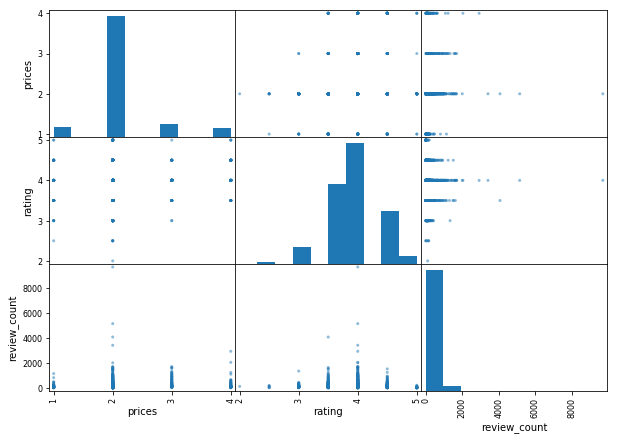

In [42]:
val_df = df[['prices', 'rating', 'review_count']]
pd.plotting.scatter_matrix(val_df, figsize=(10,7))
plt.show()

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [ ]:
import folium

long = data['region']['center']['longitude']
lat = data['region']['center']['latitude']
#Create a map of the area
base_map = folium.Map([lat, long], zoom_start=13)
base_map

In [ ]:
#list of tuples in form (latitude, longitude)
coords = df['coordinates'].map(lambda x: (x['latitude'], x['longitude']))
#print(coords)
#create a tuple of (name, rating, price) for description
name = df['name']
rating = df['rating']
price = df['price']
#desc = [(x['name'], x['rating'], x['price']) for x in list(range(len(name))) ]
subset = df[['name', 'rating', 'price']]
desc = [tuple(x) for x in subset.values]


#go through each point and plot
for i in range(len(coords)):
    lat = coords[i][0]
    long = coords[i][1]
    #print(lat, long)
    r_name = desc[i][0]
    r_rating = desc[i][1]
    r_price = desc[i][2]
    #add description - name, rating and price
    popup_text = "Restaurant Name: {}, Rating: {}, Price: {}".format(r_name, r_rating, r_price)
    #print(popup_text)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup)
    #print(marker)
    marker.add_to(base_map)
base_map


In [ ]:
df['coordinates']

## Summary

Nice work! In this lab, you synthesized your skills for the day, making multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice map visual to display the results! Well done!